# Principal Component Analysis (PCA):  [Link](https://github.com/AdilShamim8/50-Days-of-Machine-Learning/tree/main/Day%2029%20PCA%20(Principal%20Component%20Analysis))
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a dataset with many correlated variables into a set of new uncorrelated variables—called *principal components*. These components capture the maximum variance (information) in the data with fewer dimensions, which is especially useful for visualization and speeding up machine learning algorithms.

---

## Step 1: Standardization

PCA is sensitive to the scale of the variables. Therefore, the first step is to standardize the dataset so that each feature has a mean of zero and a standard deviation of one.

For a given feature \( x \):

$$
z = \frac{x - \mu}{\sigma}
$$

where:  
- \( \mu \) is the mean of \( x \)  
- \( \sigma \) is the standard deviation of \( x \)

---

## Step 2: Compute the Covariance Matrix

Let \( X \) be the \( n \times p \) data matrix (with \( n \) observations and \( p \) features). After centering the data (subtracting the mean), the covariance matrix \( C \) is computed as:

$$
C = \frac{1}{n-1} X^\top X
$$

This \( p \times p \) matrix contains the variances along the diagonal and the covariances off the diagonal.

---

## Step 3: Compute Eigenvalues and Eigenvectors

Next, solve the eigenvalue problem for the covariance matrix \( C \):

$$
C\,v = \lambda\,v
$$

where:  
- \( v \) is an eigenvector (which gives the direction of a principal component)  
- \( \lambda \) is the corresponding eigenvalue (which quantifies the variance captured along that direction)

The eigenvectors provide the directions of the new axes (principal components), and the eigenvalues tell us how much variance each principal component captures.

---

## Step 4: Select Principal Components

Sort the eigenvectors by their eigenvalues in **descending order**. To reduce the dimensionality from \( p \) to \( k \) (where \( k < p \)), select the first \( k \) eigenvectors. Let \( V_k \) be the \( p \times k \) matrix formed by these eigenvectors.

---

## Step 5: Transform the Data

Project the original (centered and standardized) data onto the new \( k \)-dimensional subspace:

$$
Y = X\,V_k
$$

The new data matrix \( Y \) (of dimensions \( n \times k \)) represents the data in terms of the principal components.

---

## Python Implementation

Below is a complete Python example that demonstrates these steps:


Covariance Matrix:
 [[ 1.01010101  0.00847357  0.15071309]
 [ 0.00847357  1.01010101 -0.09051442]
 [ 0.15071309 -0.09051442  1.01010101]]

Eigenvalues:
 [0.83047325 1.18225258 1.0175772 ]

Eigenvectors:
 [[ 0.60477096 -0.60841001 -0.51389624]
 [-0.38094623  0.34566692 -0.85755137]
 [-0.69937977 -0.714389    0.02272218]]

Sorted Eigenvalues:
 [1.18225258 1.0175772  0.83047325]

Transformed Data (first 5 observations):
 [[-0.03143212 -0.74650697]
 [-0.47842195  0.11987625]
 [-0.51445355 -1.04293822]
 [ 0.58694418 -0.69055038]
 [ 1.53408264 -1.44082025]]


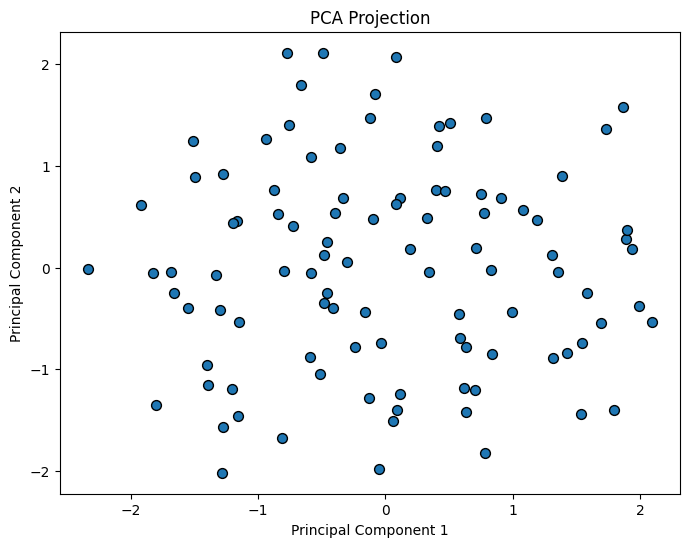

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Example: Create a dummy dataset with 100 observations and 3 features
np.random.seed(0)
data = np.random.rand(100, 3)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# Step 1: Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)

# Step 3: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 4: Sort eigenvectors by eigenvalues (descending order)
sorted_idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_idx]
sorted_eigenvectors = eigenvectors[:, sorted_idx]
print("\nSorted Eigenvalues:\n", sorted_eigenvalues)

# Select the top 2 principal components (for visualization, for example)
k = 2
V_k = sorted_eigenvectors[:, :k]

# Step 5: Transform the data to the new subspace
Y = X_std.dot(V_k)
print("\nTransformed Data (first 5 observations):\n", Y[:5])

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()